In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
#Drop unnecessary index
df.drop(columns=['ID#'], inplace=True, errors='ignore')

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values # no missing values

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [5]:
# Basic statistics
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
# Scale the data for correlation heatmap
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


<Figure size 1600x1200 with 0 Axes>

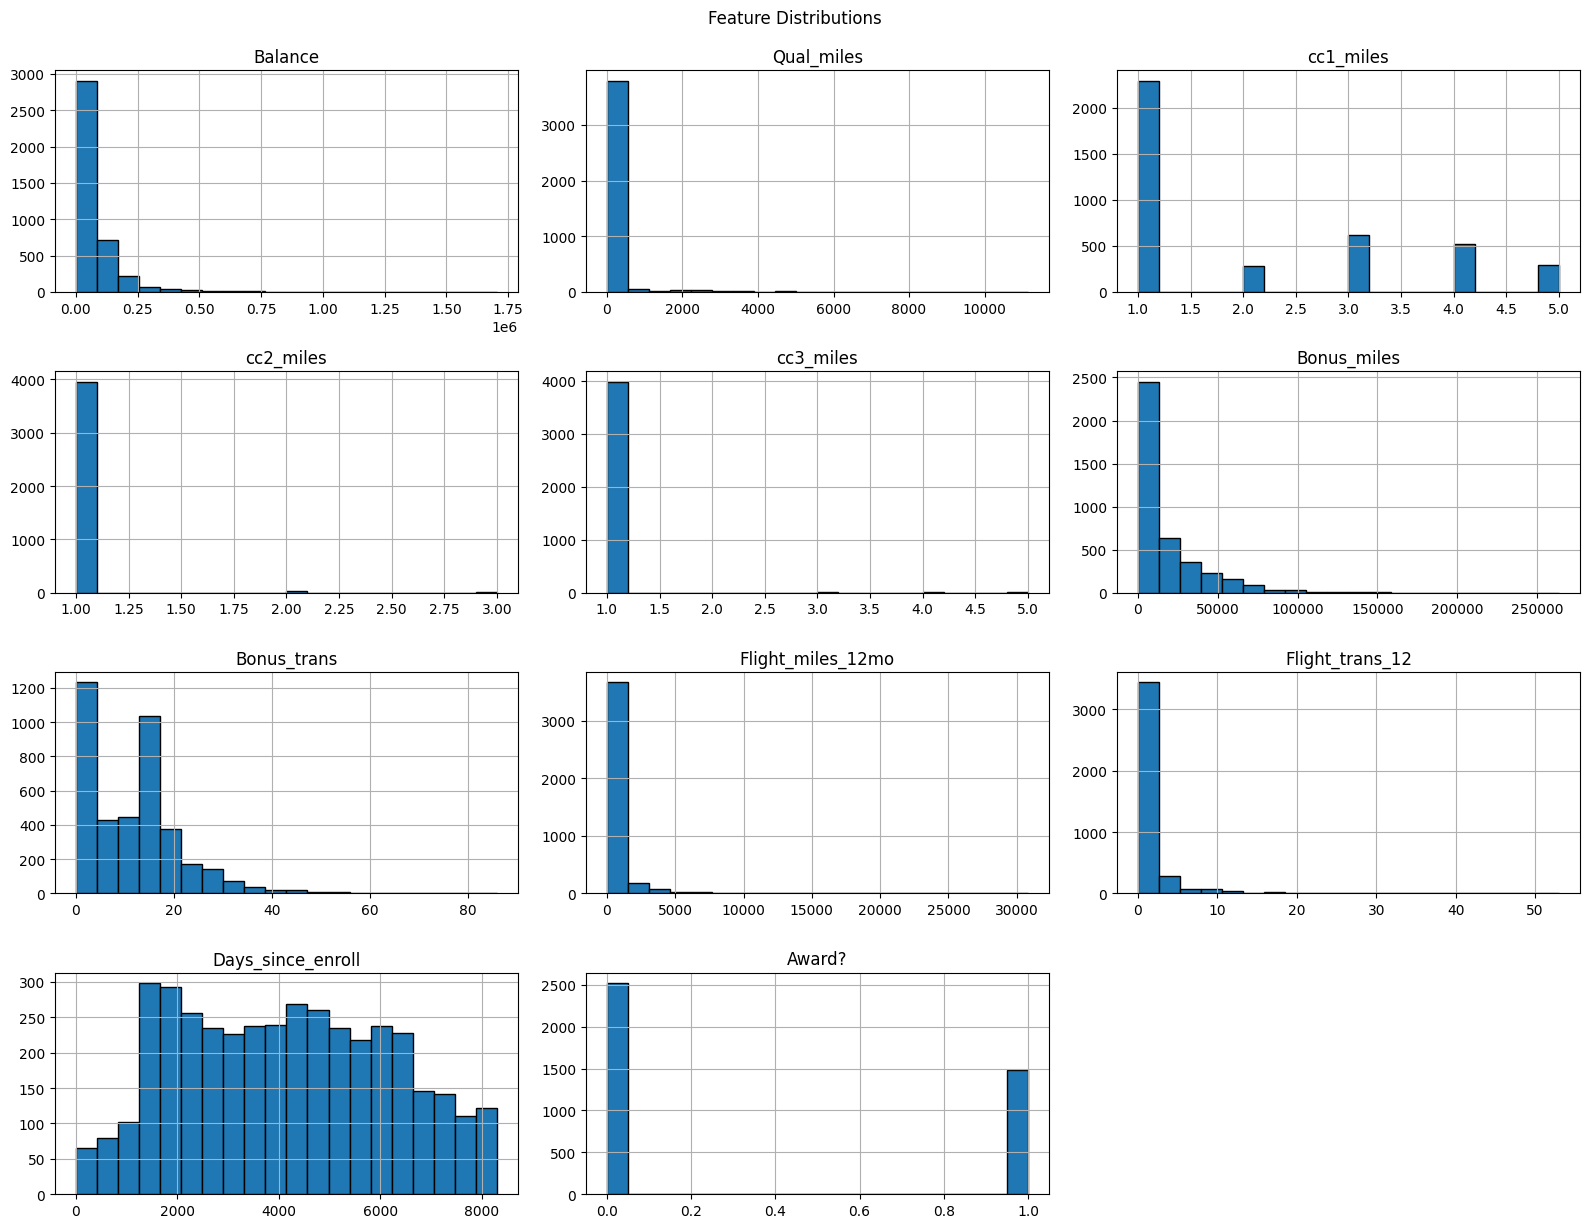

In [7]:
# Plot histograms
plt.figure(figsize=(16, 12))
df.hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

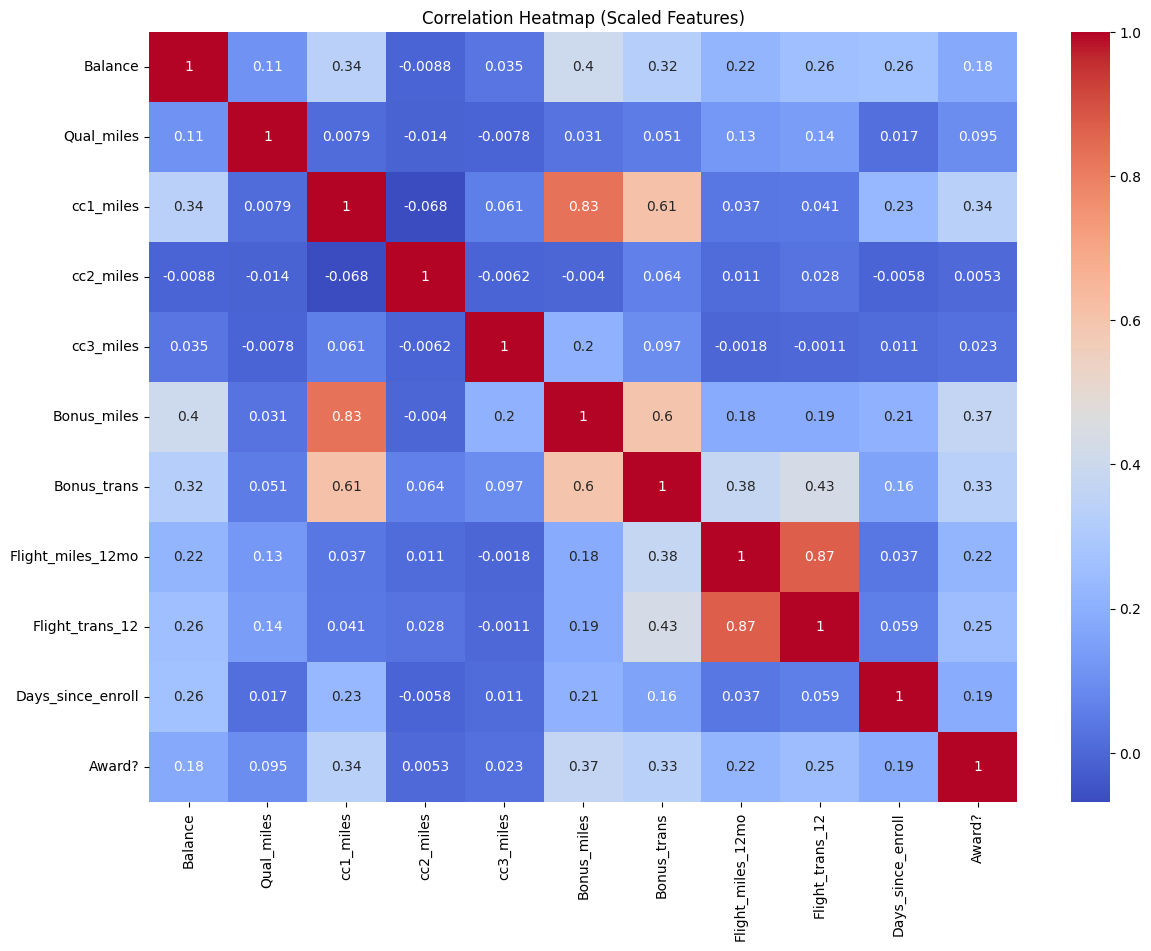

In [8]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Scaled Features)")
plt.show()

# K-Means Clustering

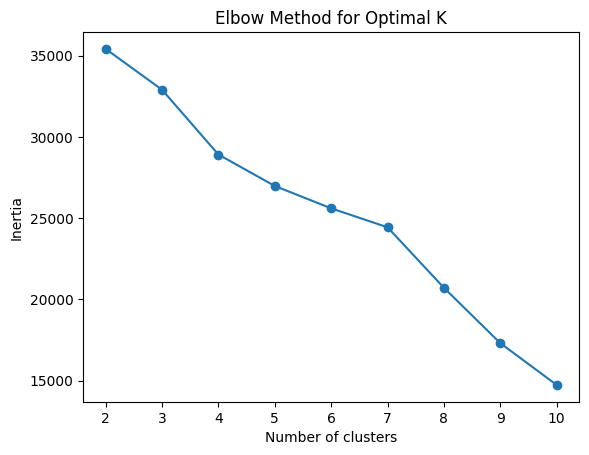

KMeans Silhouette Score: 0.19071186813310886


In [9]:
# Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Change cluster number based on elbow
kmeans_labels = kmeans.fit_predict(df_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Silhouette Score
print("KMeans Silhouette Score:", silhouette_score(df_scaled, kmeans_labels))

# Hierarchical Clustering

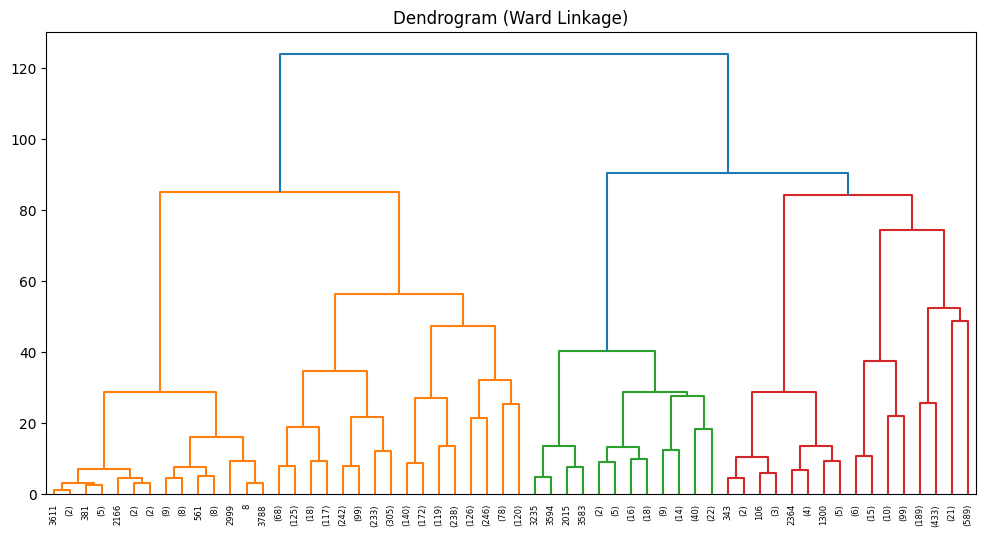

Silhouette Score for Hierarchical Clustering (Ward): 0.30814152852022786


In [14]:
# Linkage matrix
linked = linkage(df_scaled, method='ward')

# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (Ward Linkage)")
plt.show()

# Apply Clustering
hie_labels = fcluster(linked, t=4, criterion='maxclust')  # choose t based on dendrogram
df['Hierarchical_Cluster'] = hie_labels

# silhouette_score
score = silhouette_score(df_scaled, hie_labels)
print("Silhouette Score for Hierarchical Clustering (Ward):", score)

# DBSCAN Clustering

In [11]:
# Try different eps & min_samples
db = DBSCAN(eps=2.5, min_samples=5)
db_labels = db.fit_predict(df_scaled)
df['DBSCAN_Cluster'] = db_labels

# Silhouette Score (ignore noise points labeled as -1)
mask = db_labels != -1
print("DBSCAN Silhouette Score:", silhouette_score(df_scaled[mask], db_labels[mask]))


DBSCAN Silhouette Score: 0.5603804173428732




*   K - Means - 0.19 (Weak Clustring )
*   Hierarchical (Ward) - 0.31 (Moderate clustering: Better than K-Means)
*   DBSCAN - 0.56 (Strong clustering: Well-separated and dense clusters, clear groupings.)


# Cluster Visualization (Using PCA)

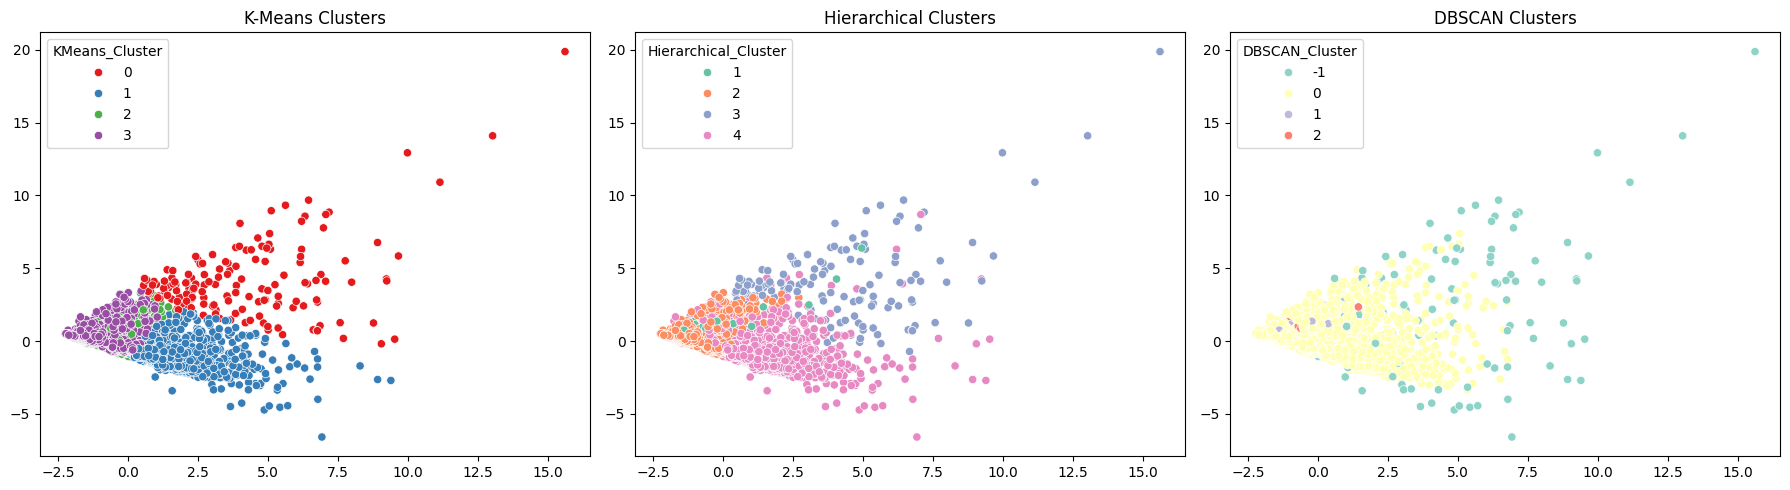

In [12]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

plt.figure(figsize=(18, 5))

# K-Means
plt.subplot(1, 3, 1)
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['KMeans_Cluster'], palette='Set1')
plt.title("K-Means Clusters")

# Hierarchical
plt.subplot(1, 3, 2)
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['Hierarchical_Cluster'], palette='Set2')
plt.title("Hierarchical Clusters")

# DBSCAN
plt.subplot(1, 3, 3)
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['DBSCAN_Cluster'], palette='Set3')
plt.title("DBSCAN Clusters")

plt.tight_layout()
plt.show()


DBSCAN performs well because it is well seperated and handles outliers very well

K-Means formed 4 clusters but had the lowest silhouette score (0.19). Clusters overlapped, showing it struggled with shape and separation. It’s not ideal for this dataset.

Hierarchical Clustering gave a moderate silhouette score (0.31) and formed more defined groups. It shows better separation than K-Means but still mixes some clusters.

DBSCAN performed the best with a high silhouette score (0.56). It formed clear, well-separated clusters and detected outliers. It’s great for identifying natural groupings in the data.

Conclusion: DBSCAN is the most effective algorithm for this dataset, followed by Hierarchical, while K-Means performed the weakest.



Cluster Visualization

To better understand how the clustering algorithms performed, we visualized the results using scatter plots for K-Means, Hierarchical Clustering, and DBSCAN:

Each plot shows the clusters in different colors, making it easy to see how data points are grouped.

K-Means plot shows some overlap between clusters, indicating weak boundaries.

Hierarchical plot displays more compact clusters, but a few points are still mixed.

DBSCAN plot clearly separates the clusters and marks outliers (shown in yellow as -1), showing it handles noise better.

These plots helped us visually compare the performance of each clustering method and support our conclusion that DBSCAN provided the best separation.

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN

# --- K-Means Evaluation ---
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

# --- DBSCAN Evaluation ---
dbscan = DBSCAN(eps=1.2, min_samples=10)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Filter out noise points for silhouette score
mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("DBSCAN did not form enough clusters to compute silhouette score.")


K-Means Silhouette Score: 0.19071186813310886
DBSCAN Silhouette Score: 0.30831103912322894
